In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = 21, 15
plt.rcParams['xtick.labelsize']=65
plt.rcParams['ytick.labelsize']=65
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

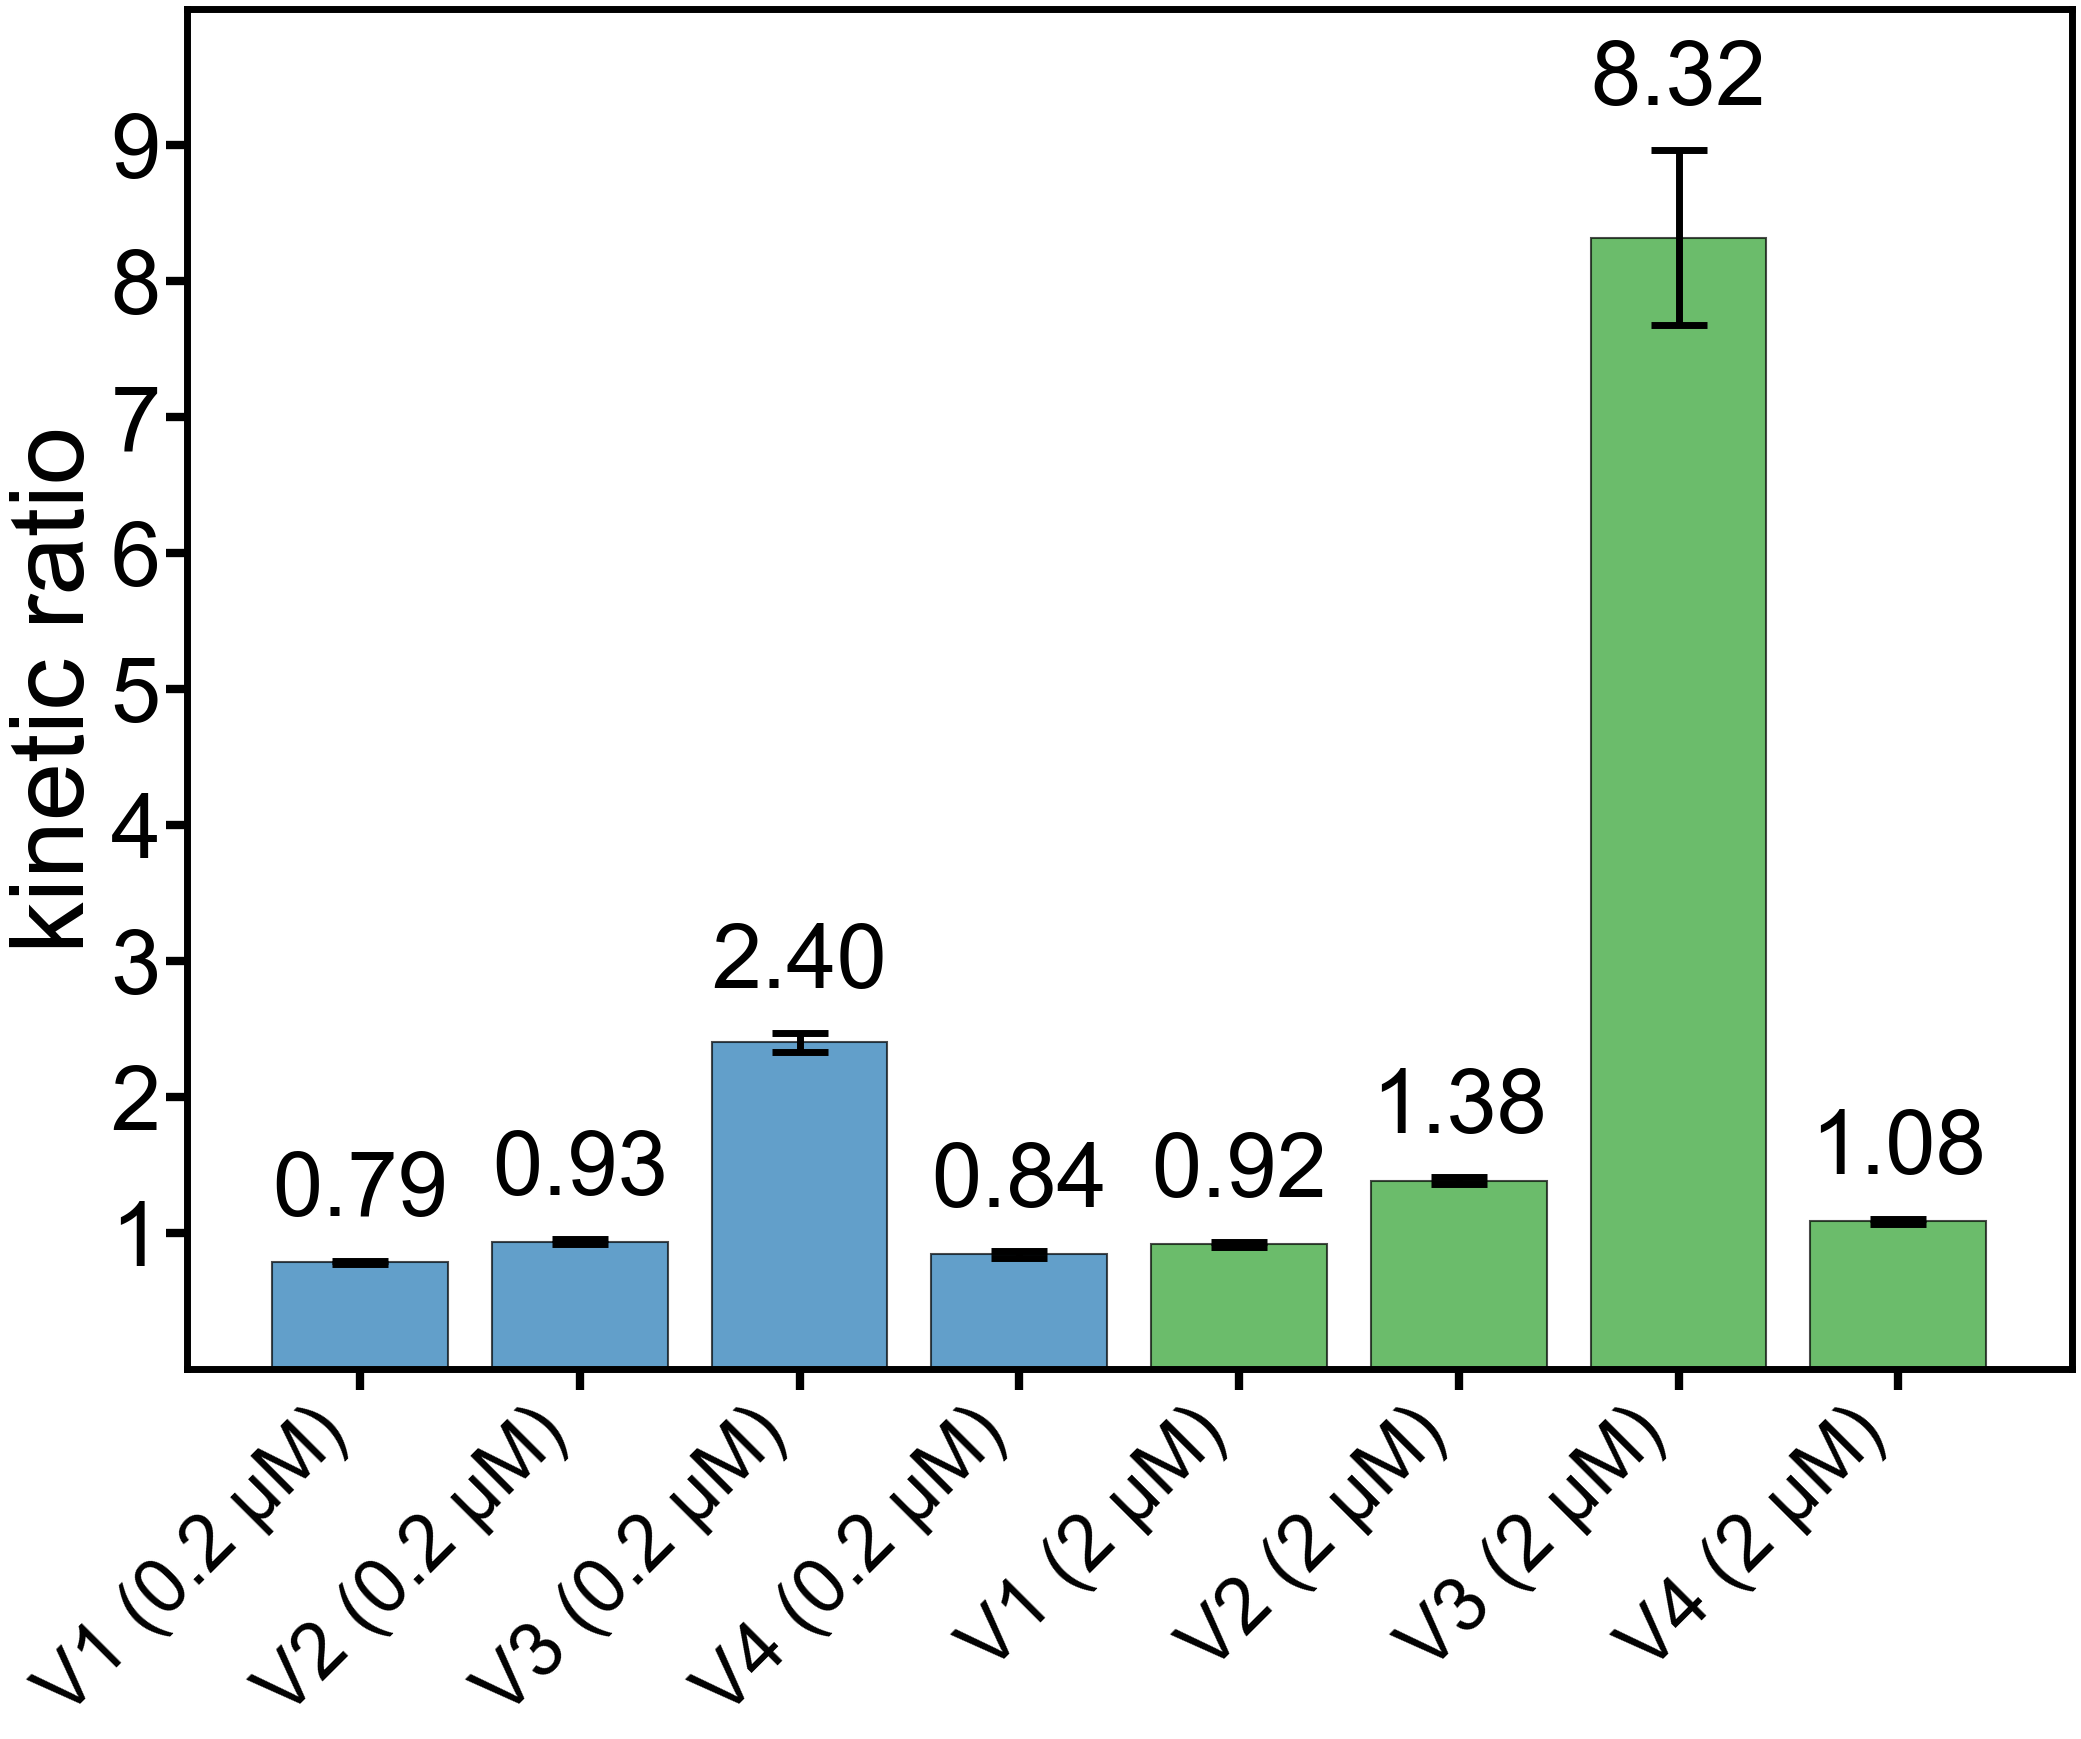

In [4]:
df = pd.read_excel("Figure2.xlsx", sheet_name="Sheet1")

reference_cols = ["pos tTetO", "pos tTetO.1", "pos tTetO.2"]
reference_times = []
for col in reference_cols:
    above = df[df[col] > 100]
    if not above.empty:
        reference_times.append(above.iloc[0]["time"])

sample_cols = [col for col in df.columns if col not in reference_cols + ["time"]]
sample_groups = defaultdict(list)
for col in sample_cols:
    base = col.replace(".1", "").replace(".2", "")
    sample_groups[base].append(col)

all_ratios = {}
for label, trip_cols in sample_groups.items():
    t100_values = []
    for col in trip_cols:
        above = df[df[col] > 100]
        if not above.empty:
            t100_values.append(above.iloc[0]["time"])

    ratios = [rna / ref for rna in t100_values for ref in reference_times if ref > 0]
    if ratios:
        all_ratios[label] = {
            "mean": np.mean(ratios),
            "std": np.std(ratios, ddof=1),
            "values": ratios,
        }

renamed_ratios = {}
for key, val in all_ratios.items():
    corrected_key = key.replace("0 µM", "0.2 µM")
    renamed_ratios[corrected_key] = val

plot_order = [
    "Version 1 at 0.2 µM", "Version 2 at 0.2 µM",
    "Version 3 at 0.2 µM", "Version 4 at 0.2 µM",
    "Version 1 at 2 µM",   "Version 2 at 2 µM",
    "Version 3 at 2 µM",   "Version 4 at 2 µM"
]

labels_to_plot = [label for label in plot_order if label in renamed_ratios]
means = [renamed_ratios[label]["mean"] for label in labels_to_plot]
stds = [renamed_ratios[label]["std"] for label in labels_to_plot]

x_labels = [label.replace("Version ", "V").replace(" at ", " (") + ")" for label in labels_to_plot]
bar_colors = ['#1f77b4' if '0.2 µM' in label else '#2ca02c' for label in labels_to_plot]

fig, ax = plt.subplots(figsize=(21, 17.5))

bars = ax.bar(
    x_labels,
    means,
    yerr=stds,
    capsize=20,
    color=bar_colors,
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7,
    error_kw={"elinewidth": 5, "capthick": 5} 
)


for bar, mean, std in zip(bars, means, stds):
    height = mean + std
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        f"{mean:.2f}",
        ha='center',
        va='bottom',
        fontsize=65,
        fontweight='bold'
    )

ax.set_ylim([0, 10])
ax.set_yticks(np.arange(1, 10, 1))
ax.set_ylabel("kinetic ratio", fontsize=75)
ax.tick_params(axis='both', which='major', length=15, width=6)
ax.tick_params(axis='y', labelsize=65)
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=55)

plt.tight_layout()
plt.savefig("Figure2.svg", format="svg", dpi=300)
plt.show()